<a href="https://colab.research.google.com/github/Bindubhavana2004/infosys/blob/main/Milestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1:Load the dataset from previously saved and Preprocess the Data**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/Cleaned_Dataset_for_Online_Payment (3) (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Unnamed: 0      amount  oldbalanceOrg  newbalanceOrig  type_CASH_OUT  \
0           0    76550.74     1096252.93      1172803.66          False   
1           1    12617.11      339181.87       326564.76          False   
2           2    22877.00       22877.00            0.00          False   
3           3   182739.36      182739.36            0.00          False   
4           4  4738282.28     4738282.28            0.00           True   

   type_DEBIT  type_PAYMENT  type_TRANSFER  isFraud  
0       False         False          False    False  
1       False          True          False    False  
2       False         False           True     True  
3       False         False           True     True  
4       False         False          False     True  


# Step 2: Split Dataset
1) Split the dataset into training (70%), validation (15%), and testing (15%) sets with stratification to maintain class distribution.\
2) Convert the target variable to binary format.\
3) Save each split locally.\
4) Print details on split sizes and class distribution.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=['isFraud'])  # Features (all columns except target)
y = data['isFraud']  # Target variable

# Split the dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)  # 50% of temp for val and test

# Output the shapes of the datasets
print("\nShapes of the datasets:")
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)


Shapes of the datasets:
Training set: (11498, 8) (11498,)
Validation set: (2464, 8) (2464,)
Testing set: (2464, 8) (2464,)


# Step 3:visualize the distribution of fraud and non-fraud cases in different subsets of a dataset
Data Preparation: The code creates a dictionary containing the counts of fraud and non-fraud cases in each dataset (training, validation, and testing). These counts are stored in a DataFrame for easy manipulation.

Data Transformation: To make it easier to plot, the DataFrame is "melted," which means it's reshaped to a format compatible with Seaborn, a plotting library.

Visualization:
A bar plot is created, showing the fraud and non-fraud counts for each dataset subset.
The plot has labels, a title, and uses a pastel color palette for a clearer view of the data balance across different sets.

Display: Finally, the plot is displayed, giving a visual summary of how fraud and non-fraud cases are distributed in the training, validation, and testing datasets. This helps in assessing whether the data splits are consistent and appropriate for model training and evaluation.

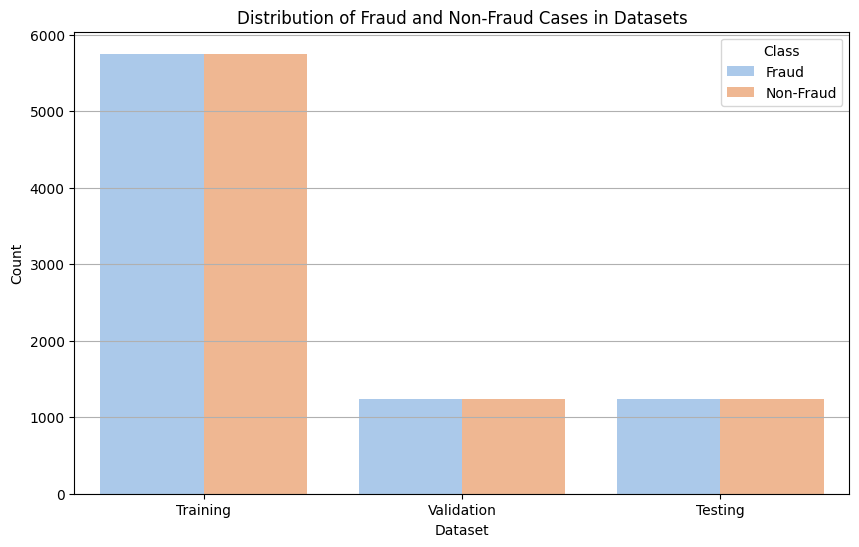

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the counts for plotting
data_counts = {
    'Set': ['Training', 'Validation', 'Testing'],
    'Fraud': [y_train.value_counts().iloc[1], y_val.value_counts().iloc[1], y_test.value_counts().iloc[1]],
    'Non-Fraud': [y_train.value_counts().iloc[0], y_val.value_counts().iloc[0], y_test.value_counts().iloc[0]]
}

counts_df = pd.DataFrame(data_counts)

# Melt the DataFrame for easier plotting with Seaborn
melted_counts = counts_df.melt(id_vars='Set', var_name='Class', value_name='Count')

# Set the color palette for better visualization
sns.set_palette("pastel")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Set', y='Count', hue='Class', data=melted_counts)
plt.title('Distribution of Fraud and Non-Fraud Cases in Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

# Step 4:converting categorical labels in y_train and y_test into binary numeric values

In [ ]:
# Encode the labels as 1 and 0
y_train_encoded = y_train.map({'Fraud': 1, 'No Fraud': 0})
y_test_encoded = y_test.map({'Fraud': 1, 'No Fraud': 0})

# Step 5: importing essential libraries for machine learning tasks
1)LabelEncoder from sklearn.preprocessing: Used to convert categorical labels into numerical values, helpful for transforming target labels into a format suitable for model input.

2)GridSearchCV from sklearn.model_selection: A tool for optimizing model hyperparameters by testing different parameter combinations and finding the best configuration based on cross-validation.

3)xgboost as xgb: The xgboost library provides the XGBoost algorithm, an efficient and powerful gradient boosting algorithm commonly used for classification and regression tasks due to its speed and performance.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


# Step 6:demonstrating how to use LabelEncoder to convert categorical labels into numeric values, suitable for machine learning models
1)Label Preparation: Placeholder comments suggest replacing y_train with actual training labels.

2)Label Encoding:

The LabelEncoder is initialized.

fit_transform is applied to y_train to encode the training labels. This method first learns the encoding based on y_train and then transforms it.

transform is used on y_test to apply the same encoding (without fitting again), ensuring consistency between training and test labels.

3)Verification: The encoded labels are printed for both y_train and y_test to verify that the encoding was successful.

In [ ]:
# Example labels - ensure you replace these with your actual labels
# y_train = ... (your training labels)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)  # For training labels
y_test_encoded = label_encoder.transform(y_test)        # For test labels

# Check the encoded labels
print("Encoded training labels:", y_train_encoded)
print("Encoded test labels:", y_test_encoded)


Encoded training labels: [0 1 0 ... 1 1 0]
Encoded test labels: [1 0 1 ... 0 0 1]


# Step 7: initializes an XGBoost classifier with a log loss evaluation metric and creates a parameter grid for hyperparameter tuning. The grid includes different values for tree depth, learning rate, sample fractions, and other parameters to find the best model configuration using GridSearchCV

In [ ]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}


# Step 7: configures GridSearchCV to perform hyperparameter tuning on the XGBoost model:

Estimator: Uses xgb_model, the initialized XGBoost classifier.

Parameter Grid: Searches through param_grid combinations of hyperparameters.

Scoring: Uses the F1 score as the evaluation metric.

Cross-Validation (cv): Splits data into 5 folds for validation.

Verbose: Provides detailed output for each step of the search.

n_jobs: Sets to -1 to use all available CPU cores, speeding up the search.

In [ ]:
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)


# Step8 :fits the grid search to the training data to find the best XGBoost model configuration. After training, it retrieves the optimal model (best_xgb_model) and the best hyperparameters (best_params), printing the results.

In [ ]:
# Fit the grid search to the training data with encoded labels
grid_search.fit(X_train, y_train_encoded)

# Get the best model and parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:45:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}


# Step 9:evaluates the performance of the optimized XGBoost model on the test set:

Predictions: y_pred stores predictions made by best_xgb_model on X_test.

Accuracy: Calculates and prints the accuracy of the predictions compared to the encoded test labels, y_test_encoded.

Classification Report: Prints a detailed report showing precision, recall, F1-score, and support for each class, giving insight into model performance per label.

Confusion Matrix: Displays a confusion matrix to show the counts of true positives, false positives, true negatives, and false negatives, offering a quick overview of classification results.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))


Accuracy: 0.9943181818181818
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1232
           1       0.99      1.00      0.99      1232

    accuracy                           0.99      2464
   macro avg       0.99      0.99      0.99      2464
weighted avg       0.99      0.99      0.99      2464

Confusion Matrix:
 [[1220   12]
 [   2 1230]]


# Step10:sets up a neural network model using TensorFlow and Keras for binary classification tasks:

Library Imports: It imports necessary components from TensorFlow and Keras for building and training the model.

Model Definition: The function create_model(input_shape) defines the architecture of the neural network:

Input Layer: Accepts the shape of the input data.
Hidden Layers:
First hidden layer with 128 neurons and ReLU activation.
A dropout layer (50% dropout rate) to mitigate overfitting.
Second hidden layer with 64 neurons and ReLU activation.
Another dropout layer.
Third hidden layer with 32 neurons and ReLU activation.
Output Layer: A single neuron with a sigmoid activation function, suitable for binary classification tasks (outputting probabilities).
Model Compilation: The model is compiled with:

Optimizer: Adam optimizer for efficient training.
Loss Function: Binary cross-entropy, appropriate for binary classification problems.
Metrics: Accuracy to monitor model performance during training and evaluation.
Input Shape: The input_shape variable is defined based on the number of features in the training data, ensuring the model knows how many input features to expect.

Model Summary: Finally, model.summary() provides a detailed overview of the model architecture, including the number of layers, output shapes, and the total number of parameters.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
def create_model(input_shape):
    model = keras.Sequential()

    # Input layer
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(layers.Dropout(0.5))                   # Dropout layer to prevent overfitting
    model.add(layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(layers.Dropout(0.5))                   # Another Dropout layer
    model.add(layers.Dense(32, activation='relu'))   # Third hidden layer

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Example input shape (number of features in your dataset)
input_shape = (X_train.shape[1],)  # Adjust according to your feature set
model = create_model(input_shape)

# Summary of the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

# Step 11:  prepares for training a neural network model with TensorFlow/Keras:

Label Encoding: It initializes a LabelEncoder, transforms the target variable for the training (y_train) and validation (y_val) sets into numeric values, and prints the unique encoded values for verification.

Early Stopping Callback: Defines an EarlyStopping callback to monitor validation loss during training. If no improvement is observed over 5 epochs, training stops, and the best model weights are restored to prevent overfitting.

Model Training: Trains the model using the training data (X_train and y_train_encoded), with validation data provided to evaluate performance. The training runs for up to 50 epochs with a batch size of 32, using the early stopping callback to enhance training efficiency.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Optional: Check the unique values
print("Unique values in y_train_encoded:", set(y_train_encoded))
print("Unique values in y_val_encoded:", set(y_val_encoded))

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Stop after 5 epochs with no improvement
    restore_best_weights=True    # Restore the best model weights
)

# Train the model with encoded labels and EarlyStopping callback
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_val, y_val_encoded),  # Validation set
    epochs=50,                               # Number of epochs
    batch_size=32,                           # Batch size
    callbacks=[early_stopping],              # Early stopping callback
    verbose=1                                # Verbosity level
)


Unique values in y_train_encoded: {0, 1}
Unique values in y_val_encoded: {0, 1}
Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7467 - loss: 13721.1504 - val_accuracy: 0.9399 - val_loss: 680.1213
Epoch 2/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 3452.2336 - val_accuracy: 0.9460 - val_loss: 407.1069
Epoch 3/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8966 - loss: 2154.0415 - val_accuracy: 0.9257 - val_loss: 234.4163
Epoch 4/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8875 - loss: 1410.9485 - val_accuracy: 0.9249 - val_loss: 115.5947
Epoch 5/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9033 - loss: 634.1906 - val_accuracy: 0.9184 - val_loss: 92.4234
Epoch 6/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9073 - loss: 960.9031 - val_accuracy: 0.9269 - val_loss: 79.5894
Epoch 7/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9011 - loss: 608.5802 - val_accuracy: 0.9115 - val_loss: 63

In [ ]:
pip install joblib


# Step 12: saves the trained model to a file using joblib:

Model Saving: It specifies a filename (fraud_detection_model.pkl) for the saved model.

Joblib Dump: The joblib.dump() function saves the trained model to the specified file.

Confirmation Message: It prints a message confirming that the model has been saved successfully.

In [ ]:
import joblib

# Assuming 'model' is your trained model
model_filename = 'fraud_detection_model.pkl'  # Change the name as needed
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to fraud_detection_model.pkl


# Step 13: snippet is designed for use in Google Colab to save and download a trained model:

Model Saving: It uses joblib.dump() to save the trained model as fraud_detection_model.pkl.

File Download: The files.download() function from the google.colab module is called to download the saved model file directly to the user's local machine.

In [ ]:
from google.colab import files

# Save the model as shown before
joblib.dump(model, 'fraud_detection_model.pkl')

# Download the model file
files.download('fraud_detection_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step14:  snippet saves a trained LabelEncoder to a file for later use:

Label Encoding: It initializes a LabelEncoder and fits it to the target labels (y_train), transforming them into numeric values.

Model Saving: The trained LabelEncoder is saved to a file named label_encoder.pkl using joblib.dump().

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()

# Assuming y_train contains your target labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Save the LabelEncoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

# Step 15: snippet demonstrates how to load a previously saved trained model and label encoder:

Model Loading: It uses joblib.load() to load the saved model from the file fraud_detection_model.pkl.

Label Encoder Loading: Similarly, it loads the saved LabelEncoder from the file label_encoder.pkl.

In [ ]:
# Load the trained model and the label encoder
model = joblib.load('fraud_detection_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')  # Make sure this file exists


# Step 16: defines a function to predict whether a transaction is fraudulent based on user input:

Model and Encoder Loading: It loads a pre-trained fraud detection model and a label encoder from saved files using joblib.

User Input: The predict_fraud function prompts the user to input values for the required features (e.g., step, customer, age, gender, transaction type, amount, old balance, new balance).

Data Preparation: The input data is organized into a dictionary and converted into a DataFrame. Categorical features (gender and transaction type) are transformed using the label encoder, handling any unseen labels by appending them to the encoder's classes.

Column Order: The DataFrame is rearranged to match the order of features used during training.

Prediction: The model makes a prediction based on the prepared input data, and the result is printed to indicate whether the transaction is fraudulent or not.

In [ ]:
import pandas as pd
import joblib

# Load the trained model and label encoder
model = joblib.load('fraud_detection_model.pkl')  # Adjust the model file name accordingly
label_encoder = joblib.load('label_encoder.pkl')  # Load the label encoder

def predict_fraud():
    # Get user input for all 8 features the model expects
    step = int(input("Enter step: "))
    customer = int(input("Enter customer: "))
    age = int(input("Enter age: "))
    gender = input("Enter gender (MALE/FEMALE): ")
    transaction_type = input("Enter transaction type (e.g., 'CASH_IN', 'CASH_OUT', etc.): ")
    amount = float(input("Enter transaction amount (e.g., 379057.93): "))
    oldbalance_org = float(input("Enter old balance origin (oldbalanceOrg): "))  # Old balance as float
    newbalance_orig = float(input("Enter new balance origin (newbalanceOrig): "))  # New balance as float


    # Prepare the input data for the model
    input_data = {
        'step': step,
        'customer': customer,
        'age': age,
        'gender': gender,
        'type': transaction_type,
        'amount': amount,
        'oldbalanceOrg': oldbalance_org,
        'newbalanceOrig': newbalance_orig
    }

    # Convert the input data into a DataFrame
    input_df = pd.DataFrame([input_data])

    # Transform categorical features using the label encoder
    for col in ['gender', 'type']:  # Add other categorical columns if needed
        # Handle unseen labels: If a new label is encountered,
        # add it to the label encoder's classes and transform it
        if input_df[col].iloc[0] not in label_encoder.classes_:
            label_encoder.classes_ = np.append(label_encoder.classes_, input_df[col].iloc[0])

        input_df[col] = label_encoder.transform(input_df[col])


    # Ensure all columns are in the same order as during training
    # Assuming your original training data had these 8 columns in this order
    input_df = input_df[['step', 'customer', 'age', 'gender', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]

    # Make predictions
    prediction = model.predict(input_df)

    # Output the prediction
    # ... (same as before) ...
    if prediction[0] == 1:
        print("Transaction is fraudulent.")
    else:
        print("Transaction is not fraudulent.")


# Run the function to make a prediction
predict_fraud()

Enter step: 1
Enter customer: 45
Enter age: 23
Enter gender (MALE/FEMALE): FEMALE
Enter transaction type (e.g., 'CASH_IN', 'CASH_OUT', etc.): CASH_IN
Enter transaction amount (e.g., 379057.93): 2000
Enter old balance origin (oldbalanceOrg): 8000
Enter new balance origin (newbalanceOrig): 10000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Transaction is not fraudulent.
